In [42]:
import pandas as pd
import numpy as np

In [43]:
data_train = pd.read_csv('D:/downloade2/dd/949ca43ea68511eb/dataset/train.csv')
data_test = pd.read_csv('D:/downloade2/dd/949ca43ea68511eb/dataset/test.csv')

In [44]:
#data_train.isnull().sum()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [13]:
data_train.isnull().sum()
#data_train['wind_speed(m/s)'].mean()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [45]:
# data preprocessing 
# imputing missing  value with mean and mode 

# turbine status
turbine_status_mode = data_train['turbine_status'].mode()
data_train.turbine_status.fillna('turbine_status_mode',inplace=True)

# cloud level
cloud_level_mode = data_train['cloud_level'].mode()
data_train.cloud_level.fillna('cloud_level_mode',inplace=True)


# wind speed m/s
#wind_speed_mean = data_train['wind_speed(m/s)'].mean()
#data_train.wind_speed(m/s).fillna('wind_speed_mean',inplace='True')

#

In [46]:
df1 =data_train.fillna(data_train.mean())

In [48]:
# feature preprocessing 

# label encoder for turbine status and cloud level
from sklearn import preprocessing

for x in df1.columns:
    if data_train[x].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df1[x].values))
        df1[x]=lbl.transform(list(df1[x].values))


In [151]:
# buliding a linear regression model

# dependent y and indepdent varibale x
x= df1.iloc[:,2:21]
y = df1.iloc[:,21]




In [152]:
x,y

(       wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
 0            94.820023                   -99.000000              41.723019   
 1           241.832734                    27.764785             -99.000000   
 2            95.484724                     0.383727              41.855473   
 3           238.819424                   -99.000000              45.443914   
 4            10.722890                     0.383727              41.981183   
 ...                ...                          ...                    ...   
 28195        94.765699                    23.576793              45.399352   
 28196        94.196738                    24.034329              42.068979   
 28197        94.160463                    28.674296              45.004213   
 28198        95.430377                    26.560254              48.032624   
 28199        43.558352                    18.721231               9.220208   
 
        blades_angle(°)  gearbox_temperature(°C)  

In [122]:
import statsmodels.api as sm

#x= sm.add_constant(x)
model= sm.OLS(y,x)
results = model.fit()

In [123]:
results.rsquared,results.rsquared_adj

(0.9057788130957275, 0.9057152879351164)

In [124]:
print(results.summary())

                                       OLS Regression Results                                      
Dep. Variable:     windmill_generated_power(kW/h)   R-squared (uncentered):                   0.906
Model:                                        OLS   Adj. R-squared (uncentered):              0.906
Method:                             Least Squares   F-statistic:                          1.426e+04
Date:                            Mon, 24 May 2021   Prob (F-statistic):                        0.00
Time:                                    11:20:58   Log-Likelihood:                         -60321.
No. Observations:                           28200   AIC:                                  1.207e+05
Df Residuals:                               28181   BIC:                                  1.208e+05
Df Model:                                      19                                                  
Covariance Type:                        nonrobust                                                  


In [125]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=88)

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
result1 = model1.fit(x_train,y_train)



In [127]:
result1.intercept_,result1.coef_

(0.7684484174116655,
 array([-2.76917741e-03, -2.04564834e-03, -4.99064013e-04, -7.32303054e-04,
         5.66786469e-04,  3.50160626e-02,  3.39262320e-03, -9.82849722e-02,
         9.35333492e-07,  7.34504880e-02, -7.10403119e-04,  4.55391435e-03,
         1.64600237e-04, -5.56865012e-04, -3.69597281e-03,  1.16387653e-01,
         3.75040475e-03,  1.08747869e+00, -1.10637454e-03]))

In [128]:
y_pred = result1.predict(x_test)

In [129]:
x_test

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
5398,10.101458,0.383727,96.427741,96.347319,38.299252,39.479800,500.000000,35.704772,109862.057371,30.651619,43.571228,306.888883,1165.561166,5.570908,13,0,2.398975,0.234871,23.837191
8681,94.156634,-99.000000,42.165385,-99.000000,44.856757,42.463783,2478.963944,77.725085,17515.616547,36.492018,43.572298,253.505914,1780.604914,40.905299,9,2,3.767188,0.369246,25.108162
4110,95.815301,-99.000000,46.219648,3.893377,-19.880615,43.891530,2087.761900,72.119553,-134473.791967,41.888100,45.396832,91.394689,1665.672728,35.312802,8,1,2.211347,0.446666,14.605767
439,10.117481,2.892564,13.818598,46.718247,-67.544204,11.401441,525.063152,37.996145,-177370.208002,25.449752,14.185988,270.324775,-99.000000,6.153092,14,1,2.413896,0.374666,24.750502
22169,93.287966,20.209214,39.783993,38.041780,40.615850,41.698236,1084.237927,66.760125,16201.133163,23.641186,42.616762,246.471039,1663.549438,-49.899874,9,1,2.833171,0.493568,26.000269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,96.806344,41.972822,45.860305,0.107713,42.278414,43.110856,2023.312239,75.694164,17133.482482,46.612196,46.486979,306.888883,443.453719,35.549464,12,2,2.254034,0.454767,27.455904
6725,39.263554,9.171581,48.013967,-1.097823,46.575153,45.845401,951.270036,45.441890,131675.501093,39.921316,-99.000000,263.686017,1420.242310,16.128897,6,1,2.254034,0.384416,26.043609
2286,94.552943,22.450534,43.481978,-99.000000,40.918276,42.700878,1005.239201,66.639833,16229.310621,33.805858,44.008238,357.890297,1663.323244,20.000000,5,2,2.254034,0.452650,-2.348623
8935,130.826094,12.691384,-2.278266,1.266576,40.002473,43.406137,788.398647,38.070272,411890.732902,31.702485,81.093741,565.263207,1189.026000,12.188750,13,1,4.039844,0.419096,26.392940


In [130]:
y_pred

array([4.31168496, 7.72295493, 6.35415844, ..., 3.96761372, 6.78534833,
       8.57914024])

In [131]:
mean_squared_error(y_test,y_pred)

4.126581174514355

In [132]:
data_test.isnull().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                      0
cloud_level                         0
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [133]:
# test data preprocessing 
# turbine status
turbine_status_mode = data_test['turbine_status'].mode()
data_test.turbine_status.fillna('turbine_status_mode',inplace=True)

# cloud level
cloud_level_mode = data_test['cloud_level'].mode()
data_test.cloud_level.fillna('cloud_level_mode',inplace=True)

In [134]:
df2 = data_test.fillna(data_test.mean())

In [135]:
# label encoder for turbine status and cloud level
from sklearn import preprocessing

for x in df2.columns:
    if df2[x].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df2[x].values))
        df2[x]=lbl.transform(list(df2[x].values))


In [136]:
y_predict = result1.predict(df2.iloc[:,2:])

In [137]:
df2.iloc[:,2:]

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,8,2,3.185837,0.403965,25.572431
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,54283.324683,29.431813,42.728174,499.595287,1165.111992,-35.050093,0,2,3.016603,0.444755,24.371823
2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,7,2,2.611941,0.387368,27.654677
3,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,54283.324683,23.886434,13.501595,308.376140,1329.744740,15.245757,10,1,2.866805,0.450478,24.189426
4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,0,1,3.549672,0.368355,4.885440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,14,2,3.286975,0.407771,20.888674
12082,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,3,1,2.201328,0.367823,24.793606
12083,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,8,1,3.728375,0.459887,5.653451
12084,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,26.566581,0,2,2.247676,0.394680,24.591364


In [138]:
y_predict

array([3.53741998, 5.58118522, 3.74318339, ..., 4.57397369, 6.41411479,
       6.06179042])

In [139]:
df3= data_test.iloc[:,0:2]

In [140]:
df3['windmill_generated_power(kW/h)']=y_predict.tolist()

In [141]:
df3.to_csv('Sumbmission.csv')

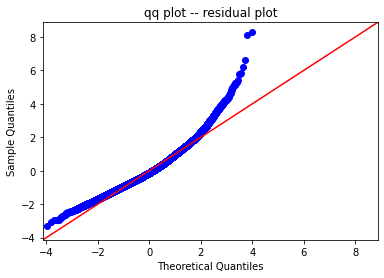

In [142]:
from scipy import stats
import matplotlib.pyplot as plt
res = results.resid
probplot = sm.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qq plot -- residual plot')
plt.show()

In [153]:
fitted_value = results.predict(x)
res = results.resid

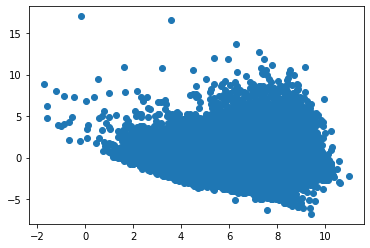

In [160]:
plt.scatter(fitted_value,res)

NameError: name 'set_title' is not defined

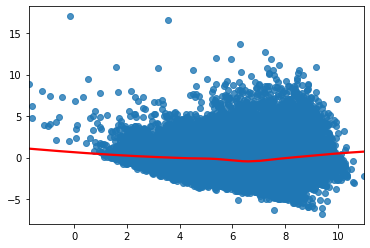

In [162]:
import seaborn as sns
#fig, ax = plt.subplots(1,2)
sns.regplot(x=fitted_value, y=res, lowess=True,  line_kws={'color': 'red'})
set_title('Residuals vs. Predicted Values', fontsize=16)
set(xlabel='Predicted', ylabel='Residuals')

In [172]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators = 500, random_state = 0)
model1.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [173]:
y_rf = model1.predict(x_test)

In [174]:
mean_squared_error(y_test,y_rf)

0.3685179096212892

In [175]:
# compute with formulas from the theory
yhat = model1.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y_test)-x.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9897982680411973 0.9488116299810895


In [176]:
y_rf1 = model1.predict(df2.iloc[:,2:])

In [177]:
df3= data_test.iloc[:,0:2]
df3['windmill_generated_power(kW/h)']=y_rf1.tolist()
df3.to_csv('C:/Users/Mahendra/Videos/Sumbmission2.csv')

In [181]:
# import xgboost as xg
# # Instantiation
# xgb_r = xg.XGBRegressor(objective ='reg:linear',
#                   n_estimators = 100, seed = 123)
  
# # Fitting the model
# xgb_r.fit(x_train, y_train)
  
# # Predict the model
# pred = xgb_r.predict(x_test)

[12:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [183]:
# y_rf2 = xgb_r.predict(df2.iloc[:,2:])
# df3= data_test.iloc[:,0:2]
# df3['windmill_generated_power(kW/h)']=y_rf2.tolist()
# df3.to_csv('C:/Users/Mahendra/Videos/Sumbmission3.csv')